# Задание 1.1

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use("ggplot")

n = 25

In [109]:
# Задаем выборку

sample = np.random.exponential(scale=1.0, size=25)

sample

array([0.29006129, 0.68765928, 0.35793046, 0.33524968, 0.03758448,
       0.94049207, 0.69851963, 0.05285109, 0.32662592, 2.38886095,
       0.27386055, 0.15653086, 0.67227211, 4.24403698, 0.27714481,
       1.11515501, 1.43388763, 0.27133317, 1.30274893, 0.4585228 ,
       1.00050375, 1.00383783, 0.76738525, 0.09462916, 1.80364479])

In [69]:
# Для непрерывных данных мода оценивается через интервалы
hist, bins = np.histogram(sample, bins='auto')
mode_bin_index = np.argmax(hist)
mode_estimate = (bins[mode_bin_index] + bins[mode_bin_index + 1]) / 2

median = sorted(sample)[n // 2] if (n % 2 == 1) else (sorted(sample)[n // 2 - 1] + sorted(sample)[n // 2]) / 2

sample_range = max(sample) - min(sample)

μ3 = np.average((sample - np.average(sample))** 3)
σ = np.sqrt(np.var(sample))
asymmetry_coef = μ3 / σ

print(f"Мода = {mode_estimate}")
print(f"Медиана = {median}")
print(f"Размах выборки = {sample_range}")
print(f"Коэффициент асимметрии = {asymmetry_coef}")


Мода = 0.19116367843954893
Медиана = 0.6359396333251601
Размах выборки = 1.5743358628184365
Коэффициент асимметрии = 0.11519756088541956


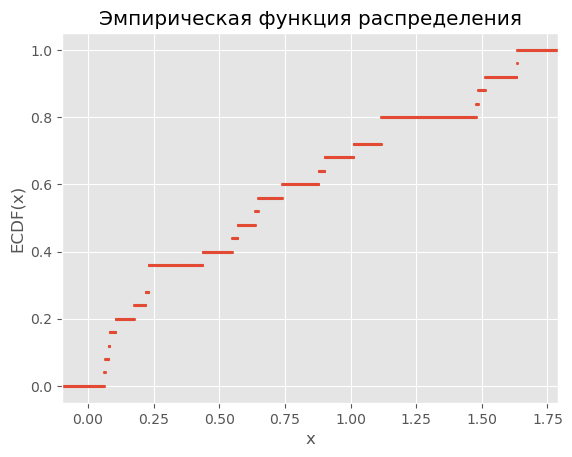

In [70]:
ecdf = ECDF(sample)

x_min = sample.min() - 0.1 * (sample.max() - sample.min())
x_max = sample.max() + 0.1 * (sample.max() - sample.min())

x_values = np.linspace(x_min, x_max, 1000)
y_values = ecdf(x_values)  

plt.scatter(x_values, y_values, s=3)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.title('Эмпирическая функция распределения')
plt.grid(True)
plt.xlim(x_min, x_max)
plt.show()

Сумма относительных частот: 1.00


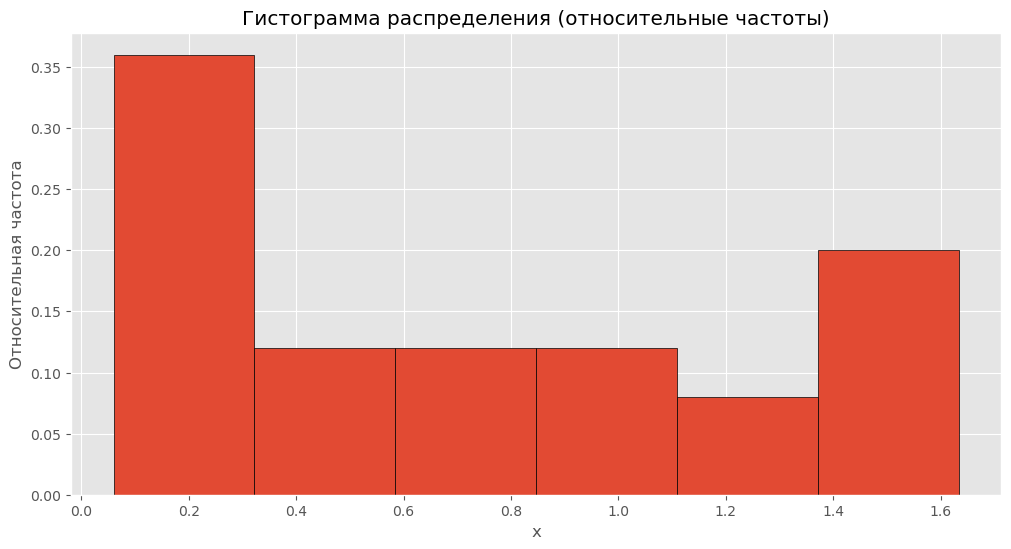

In [89]:
hist_rel = hist / len(sample)


plt.figure(figsize=(12, 6))
plt.bar(bins[:-1], hist_rel, width=np.diff(bins), align='edge', edgecolor='black')

plt.xlabel('x')
plt.ylabel('Относительная частота')
plt.title('Гистограмма распределения (относительные частоты)')
plt.grid(True)

print(f"Сумма относительных частот: {sum(hist_rel):.2f}")

plt.show()

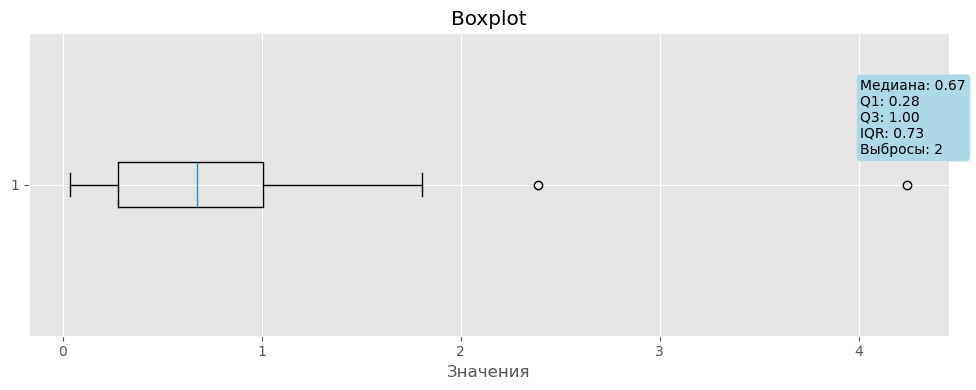

In [115]:
plt.figure(figsize=(10, 4))
plt.boxplot(sample, vert=False) 
plt.xlabel('Значения')
plt.title('Boxplot')


# Вычисление статистик
q1 = np.percentile(sample, 25)
q2 = np.median(sample)
q3 = np.percentile(sample, 75)
iqr = q3 - q1
lower_whisker = max(sample.min(), q1 - 1.5 * iqr)
upper_whisker = min(sample.max(), q3 + 1.5 * iqr)
outliers = sample[(sample < lower_whisker) | (sample > upper_whisker)]

# Добавление текста со статистикой
stats_text = f'Медиана: {q2:.2f}\n'
stats_text += f'Q1: {q1:.2f}\n'
stats_text += f'Q3: {q3:.2f}\n'
stats_text += f'IQR: {iqr:.2f}\n'
stats_text += f'Выбросы: {len(outliers)}'


plt.text(plt.xlim()[1]*0.9, 1.1, stats_text, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))



plt.tight_layout()
plt.show()